<a href="https://colab.research.google.com/github/m3t3orkoga/HomeworkCNN/blob/main/Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D ,Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir="/content/drive/MyDrive/Flower/Flowers"

img_width, img_height = 128, 128
batch_size=32

train_datagen =ImageDataGenerator(
  rescale=1.0/255,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest"
)

In [11]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode="categorical"
)

model = Sequential([
  Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation="relu"),
  Dropout(0.5),
  Dense(8, activation="softmax")
])

Found 806 images belonging to 8 classes.


In [12]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])
model.summary()

epochs = 40
history =model.fit(train_generator,epochs=epochs)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,672 (12.61 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - accuracy: 0.2792 - loss: 2.0243
Epoch 2/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.4076 - loss: 1.5437
Epoch 3/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.4629 - loss: 1.4695
Epoch 4/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 249ms/step - accuracy: 0.5423 - loss: 1.2354
Epoch 5/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.5159 - loss: 1.3006
Epoch 6/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.5121 - loss: 1.1917
Epoch 7/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.5217 - loss: 1.2250
Epoch 8/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.5632 - loss: 1.0964
Epoch 9/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 258ms/step - accuracy: 0.5746 - loss: 1.1064
Epoch 10/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.5698 - loss: 1.1272
Epoch 11/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.6027 - loss: 1.0297
Epoch 12/40
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms

In [13]:
from keras.models import load_model
model.save('/content/drive/MyDrive/flower.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


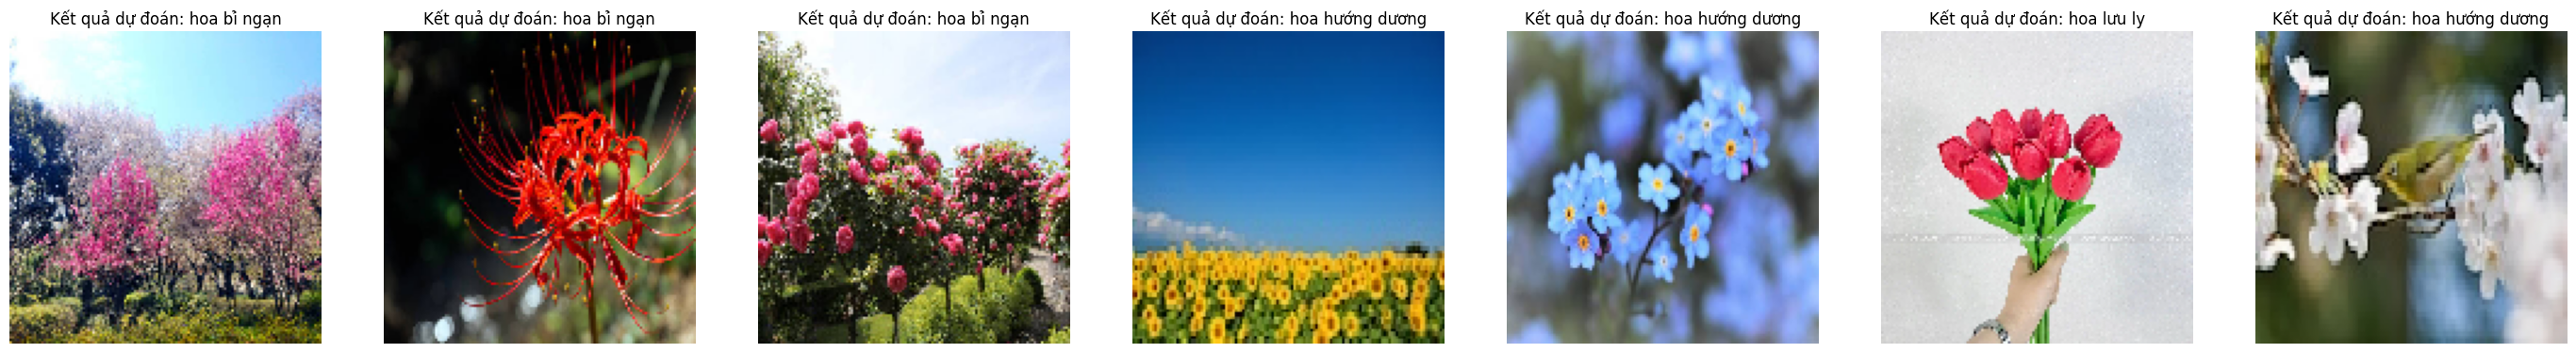

In [14]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/MyDrive/face_recognition.h5')

image_paths = [
    "/content/drive/MyDrive/Flower/Flowers/hoa anh đào/istockphoto-1124819007-612x612.jpg",
    "/content/drive/MyDrive/Flower/Flowers/hoa bỉ ngạn/istockphoto-1153997531-612x612.jpg",
    "/content/drive/MyDrive/Flower/Flowers/hoa hồng/istockphoto-1067990876-612x612.jpg",
    "/content/drive/MyDrive/Flower/Flowers/hoa hướng dương/huong duong 11.jpg",
    "/content/drive/MyDrive/Flower/Flowers/hoa lưu ly/istockphoto-1148505824-612x612.jpg",
    "/content/drive/MyDrive/Flower/Flowers/hoa tulip/tulip24.webp",
    "/content/drive/MyDrive/Flower/Flowers/hoa đào/đào 18.jpg"


]

num_images = len(image_paths)

fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(128, 128))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 128, 128, 3)
    prediction = np.argmax(model.predict(img_array))

    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    person_name = class_labels[prediction]

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Kết quả dự đoán: {person_name}")

plt.show()